# --- INSTRUCTIONS: Load the Dataset ---

In the following session, please complete:

Load the dataset as a Pandas Dataframe (Dataset: Please download [Iris.csv](https://www.kaggle.com/datasets/uciml/iris))

Our objective is building and evaluating several classification models to predict the species of an Iris flower based on the measurements (**dependent variable is "Species"**)



# --- Necessary Data Exploration and Preparation ---

In the following session, please complete:

1.   Calculate **descriptive statistics** (mean, standard deviation, etc.) for each feature (sepal length, sepal width, petal length, petal width) for each species.
2.   Create **visualizations** (scatter plots, box plots, histograms) to explore the relationships between the features and the species. For example, create scatter plots of sepal length vs. sepal width, colored by species. What patterns do you observe?
3.   **Feature Selection**
4.   **Feature Scaling**
4.   **Splitting** the data into training, testing set (80% training, 20% testing)

It's your choice to decide what to do or how to do, but please include a short sentence to explain.

NOTE** Sepal is the outer flower of the Iris, petal is the smaller inner flower!


In [273]:

import pandas as pd
df = pd.read_csv('Iris.csv')
descriptive_stats = df.groupby('Species').agg(['mean', 'std', 'min', 'max'])
descriptive_stats


Id                     SepalLengthCm                      \
                  mean       std  min  max          mean       std  min  max   
Species                                                                        
Iris-setosa       25.5  14.57738    1   50         5.006  0.352490  4.3  5.8   
Iris-versicolor   75.5  14.57738   51  100         5.936  0.516171  4.9  7.0   
Iris-virginica   125.5  14.57738  101  150         6.588  0.635880  4.9  7.9   

                SepalWidthCm                     PetalLengthCm                 \
                        mean       std  min  max          mean       std  min   
Species                                                                         
Iris-setosa            3.418  0.381024  2.3  4.4         1.464  0.173511  1.0   
Iris-versicolor        2.770  0.313798  2.0  3.4         4.260  0.469911  3.0   
Iris-virginica         2.974  0.322497  2.2  3.8         5.552  0.551895  4.5   

                     PetalWidthCm                      
                 max         mean       std  min  max  
Species                                                
Iris-setosa      1.9        0.244  0.107210  0.1  0.6  
Iris-versicolor  5.1        1.326  0.197753  1.0  1.8  
Iris-virginica   6.9        2.026  0.274650  1.4  2.5

<Figure size 1000x800 with 0 Axes>

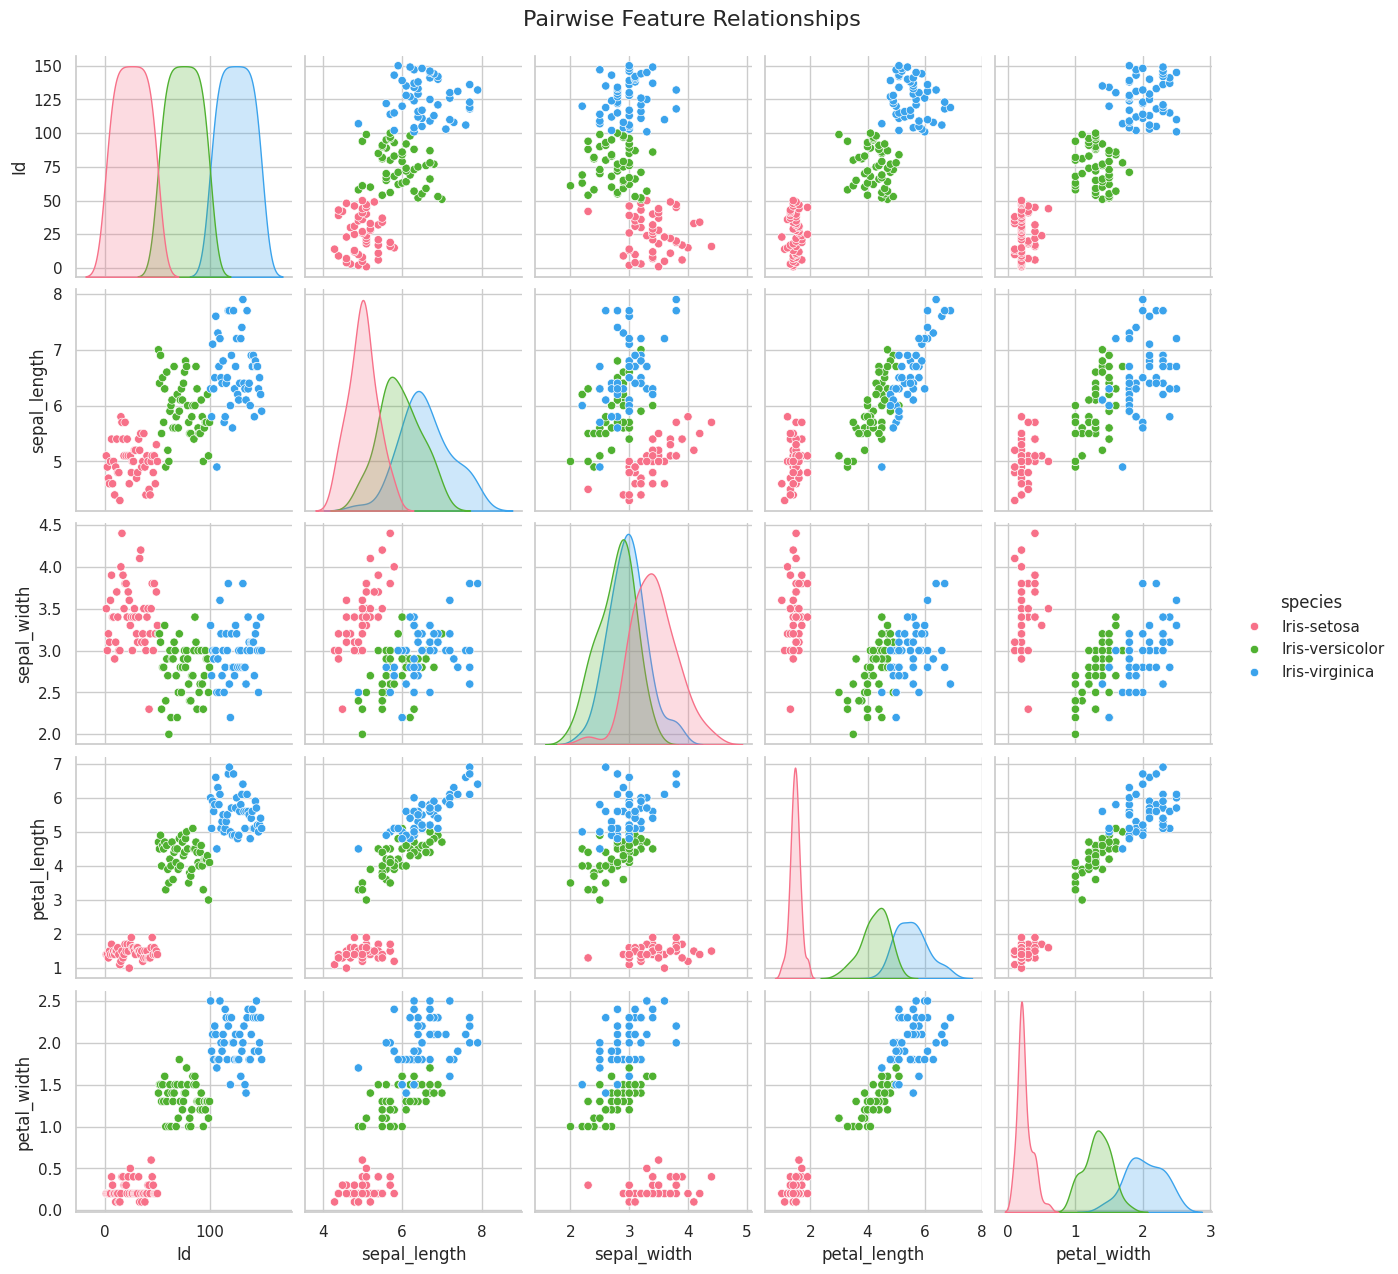

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Rename columns for better compatibility with seaborn
df.rename(columns={
    "SepalLengthCm": "sepal_length",
    "SepalWidthCm": "sepal_width",
    "PetalLengthCm": "petal_length",
    "PetalWidthCm": "petal_width",
    "Species": "species"
}, inplace=True)

# Set global style
sns.set(style="whitegrid")

# Pairplot: Explore Pairwise Feature Relationships**
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', diag_kind='kde', palette="husl")
plt.suptitle("Pairwise Feature Relationships", y=1.02, fontsize=16)
plt.show()


##**For** **Pairplot:**
- ID: 150 of each different kind of flower
- Sepal Length: in order of size S->B: Setosa, versicolor, virginica
- Sepal width : Setosa is widest, virginica and versicolor are similar and thinner.
- petal length in order of size S-> B : Setosa, Versicolor, Virginica
- Petal width is similar to last ^

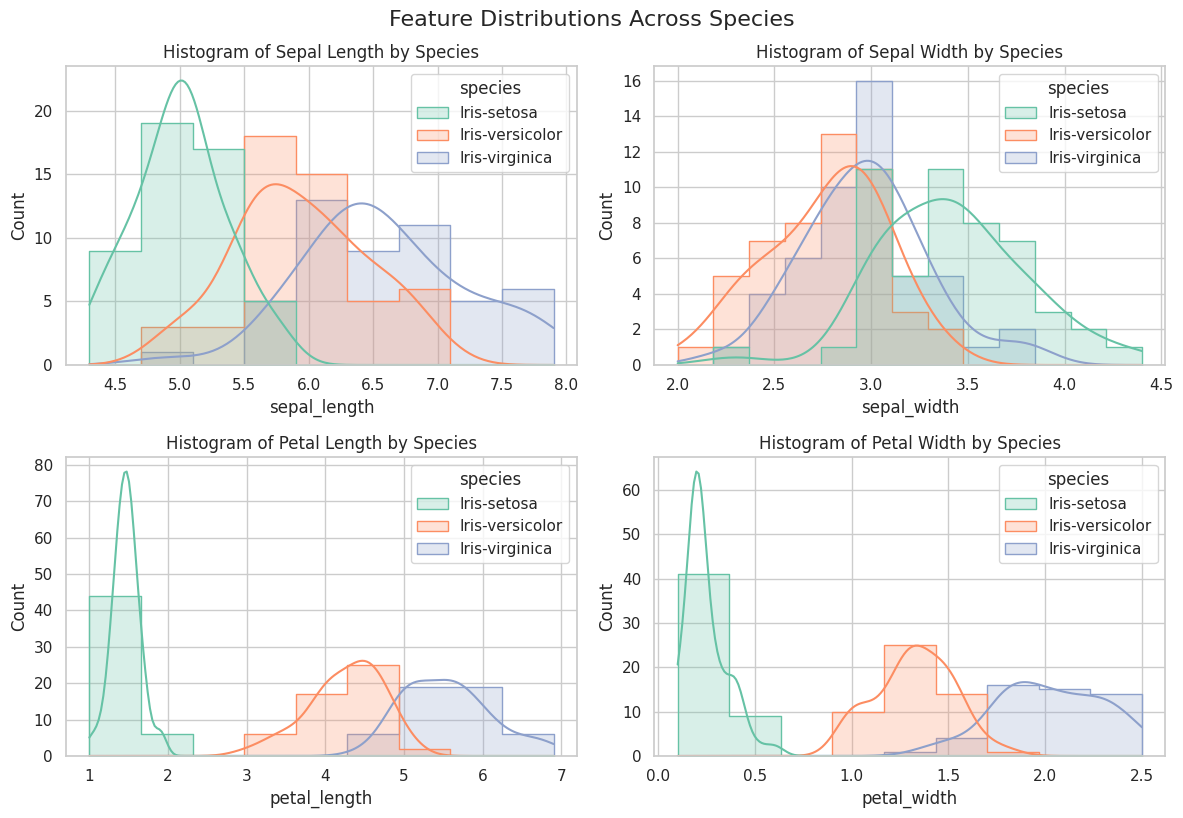

In [275]:
# Histograms: Distribution of Features Across Species**
plt.figure(figsize=(12, 8))
for i, feature in enumerate(["sepal_length", "sepal_width", "petal_length", "petal_width"], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, hue="species", kde=True, palette="Set2", element="step")
    plt.title(f"Histogram of {feature.replace('_', ' ').title()} by Species")

plt.tight_layout()
plt.suptitle("Feature Distributions Across Species", fontsize=16, y=1.02)
plt.show()

For histograms it is easier to see the previous descriptions: all follow same order except sepal width


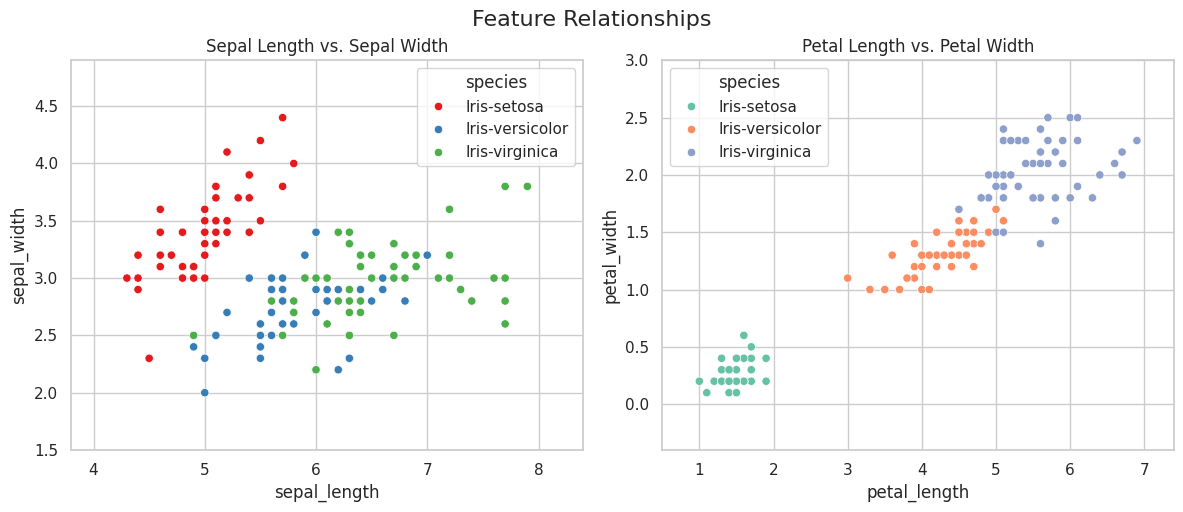

In [276]:
# Scatter Plots: Feature Relationships**
plt.figure(figsize=(12, 5))

# Scatter plot: Sepal Length vs. Sepal Width
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette="Set1")
plt.title("Sepal Length vs. Sepal Width")
plt.xlim(df["sepal_length"].min() - 0.5, df["sepal_length"].max() + 0.5)
plt.ylim(df["sepal_width"].min() - 0.5, df["sepal_width"].max() + 0.5)

# Scatter plot: Petal Length vs. Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", palette="Set2")
plt.title("Petal Length vs. Petal Width")
plt.xlim(df["petal_length"].min() - 0.5, df["petal_length"].max() + 0.5)
plt.ylim(df["petal_width"].min() - 0.5, df["petal_width"].max() + 0.5)

plt.tight_layout()
plt.suptitle("Feature Relationships", fontsize=16, y=1.02)
plt.show()

<ipython-input-277-daab4d13f1ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
<ipython-input-277-daab4d13f1ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
<ipython-input-277-daab4d13f1ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
<ipython-input-277-daab4d13f1ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

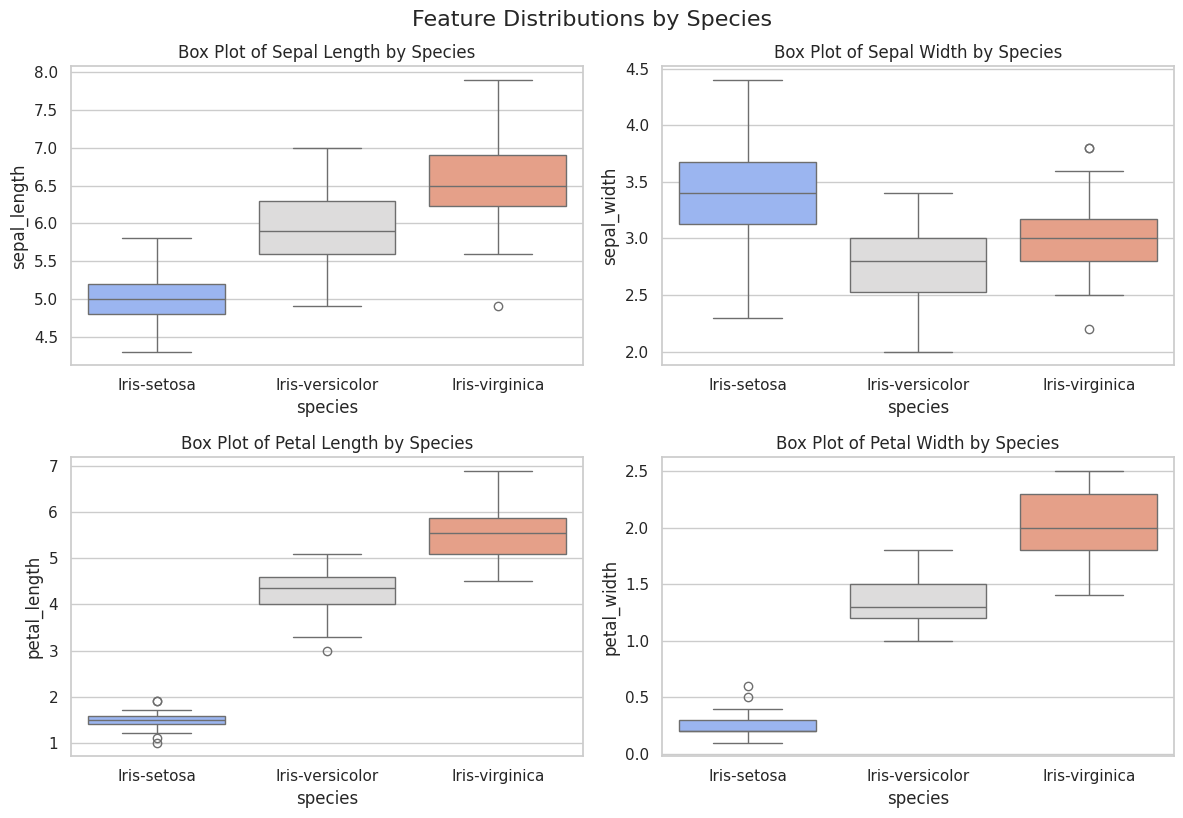

In [277]:

plt.figure(figsize=(12, 8))
for i, feature in enumerate(["sepal_length", "sepal_width", "petal_length", "petal_width"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
    plt.title(f"Box Plot of {feature.replace('_', ' ').title()} by Species")

plt.tight_layout()
plt.suptitle("Feature Distributions by Species", fontsize=16, y=1.02)
plt.show()


Use box plot to show change in outliers. here is before ^


In [278]:
#reimport data because of seaborne work
df = pd.read_csv('Iris.csv')


In [279]:
#check each columns value type

df.dtypes


,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [280]:
#remove outliers from numeric columns in df

import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    df = remove_outliers_iqr(df, col)

df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [281]:
#change the species column into one hot encode. Creates three dummy variables, one for each unique value inside.

# One-hot encode the 'species' column
df = pd.get_dummies(df, columns=['Species'], prefix=['species'])

# Replace True with 1 and False with 0
df = df.replace({True: 1, False: 0})

print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica  
0                    1                        0                       0  
1                    1                        0                       0  
2                    1                        0                       0  
3                    1                        0                       0  
4                    1                        0                       0  


<ipython-input-281-5363d68c8009>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [282]:
# normalize the numerical columns

from sklearn.preprocessing import MinMaxScaler
# Select only numerical columns for scaling
numerical_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [283]:
# Rename columns
df.rename(columns={
    "SepalLengthCm": "sepal_length",
    "SepalWidthCm": "sepal_width",
    "PetalLengthCm": "petal_length",
    "PetalWidthCm": "petal_width",
    "species_Iris-setosa": "setosa",
    "species_Iris-versicolor": "versicolor",
    "species_Iris-virginica": "virginica"
}, inplace=True)



In [284]:
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,1,0.222222,0.722222,0.067797,0.041667,1,0,0
1,2,0.166667,0.444444,0.067797,0.041667,1,0,0
2,3,0.111111,0.555556,0.050847,0.041667,1,0,0
3,4,0.083333,0.500000,0.084746,0.041667,1,0,0
4,5,0.194444,0.777778,0.067797,0.041667,1,0,0


<ipython-input-285-9a7c4582ac68>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
<ipython-input-285-9a7c4582ac68>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
<ipython-input-285-9a7c4582ac68>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
<ipython-input-285-9a7c4582ac68>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

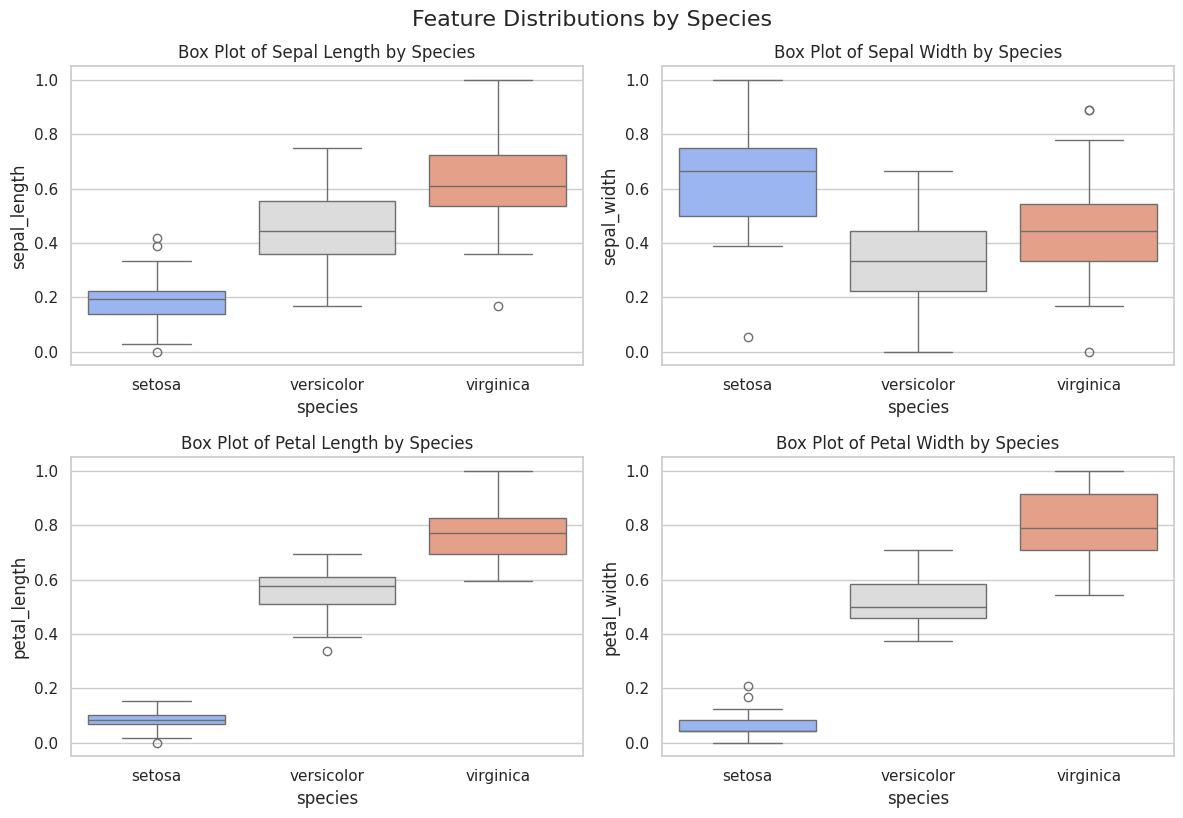

In [285]:
# Adjusted box plot code based on the provided cleaned dataframe
plt.figure(figsize=(12, 8))

# Define the mapping for species based on the dummy variables
df['species'] = df[['setosa', 'versicolor', 'virginica']].idxmax(axis=1)

# Create box plots for each feature grouped by species
for i, feature in enumerate(["sepal_length", "sepal_width", "petal_length", "petal_width"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="species", y=feature, palette="coolwarm")
    plt.title(f"Box Plot of {feature.replace('_', ' ').title()} by Species")

plt.tight_layout()
plt.suptitle("Feature Distributions by Species", fontsize=16, y=1.02)
plt.show()


In [286]:
#obviously one outlier left based on the setosa width above.I manually dropped it
print("Shape before drop:", df.shape)

# Identify rows to drop
rows_to_drop = df[(df['setosa'] == 1) & (df['sepal_width'] < 0.2)].index

# Drop the rows
df.drop(rows_to_drop, inplace=True)

print("Shape after drop:", df.shape)

df.head()


Shape before drop: (146, 9)
Shape after drop: (145, 9)


,Id,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,species
0,1,0.222222,0.722222,0.067797,0.041667,1,0,0,setosa
1,2,0.166667,0.444444,0.067797,0.041667,1,0,0,setosa
2,3,0.111111,0.555556,0.050847,0.041667,1,0,0,setosa
3,4,0.083333,0.500000,0.084746,0.041667,1,0,0,setosa
4,5,0.194444,0.777778,0.067797,0.041667,1,0,0,setosa


# --- Model Training and Evaluation with cross-validation ---

In the following session, using the training, please create models using algorithms (logistic regression, KNN, SVM):
\\

1.   **Logistic Regression** using [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  * With using the training set, implement 5-fold cross-validation. For each fold:
    * **Train** the model on the remaining k-1 folds.
    * **Evaluate** the model on the held-out fold.
      * Calculate the evaluation metrics (accuracy, precision, recall, F1-score) and create confusion matrix visualization for each fold.
      * Calculate the average of each evaluation metric across all 5 folds.
\\
2.   **KNN** using [KNeighborsClassifier](https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
  * With using the training set, implement 5-fold cross-validation. For each fold:
    * **Train** the model on the remaining k-1 folds.
    * **Evaluate** the model on the held-out fold.
      * Calculate the evaluation metrics (accuracy, precision, recall, F1-score) and create confusion matrix visualization for each fold.
      * Calculate the average of each evaluation metric across all 5 folds.
\\
3.   **SVM** using [SVC](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) - Please try to use different kernels, such as **linear, RBF and poly**
  * With using the training set, implement 5-fold cross-validation. For each fold:
    * **Train** the model on the remaining k-1 folds.
    * **Evaluate** the model on the held-out fold.
      * Calculate the evaluation metrics (accuracy, precision, recall, F1-score) and create confusion matrix visualization for each fold.
      * Calculate the average of each evaluation metric across all 5 folds.




##Logistic Regression


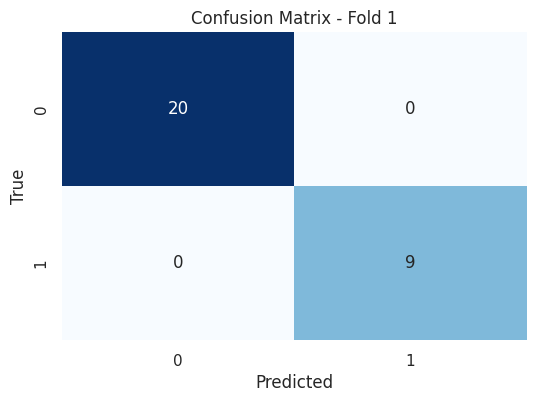

Fold 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


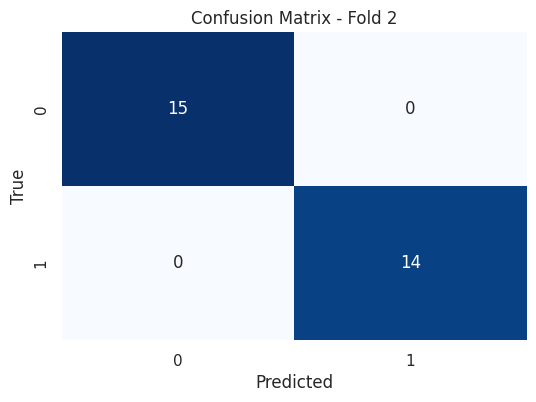

Fold 2:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


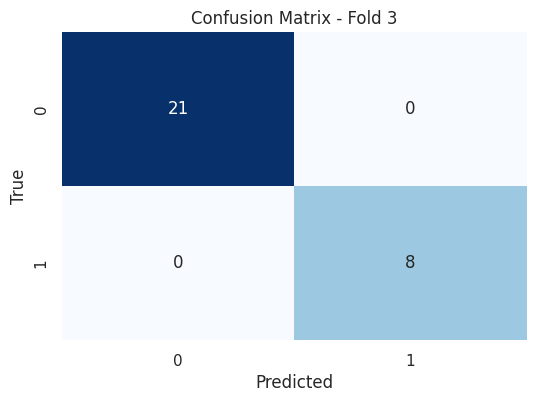

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


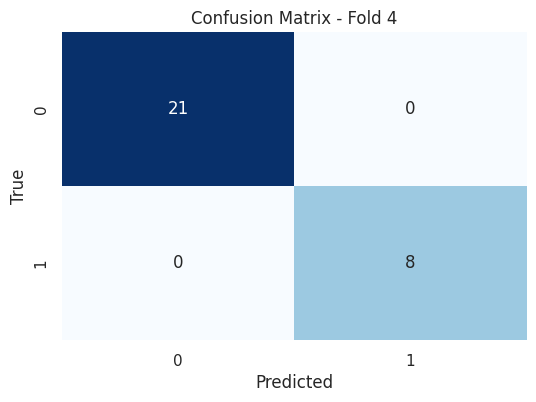

Fold 4:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


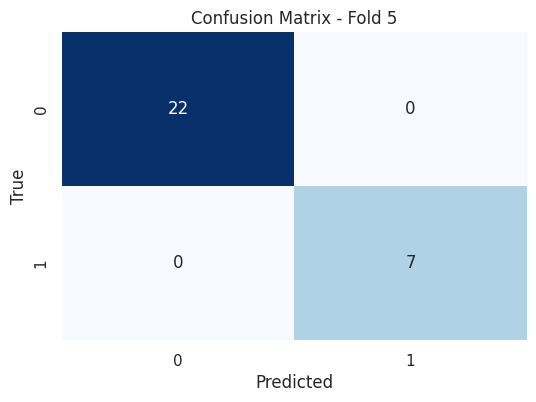

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 1.0000
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-score: 1.0000


In [287]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['setosa'].astype(int)  # Ensure binary encoding (0 or 1)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Logistic Regression model
    model_setosa = LogisticRegression()
    model_setosa.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_setosa.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Create confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics for current fold
    print(f"Fold {fold + 1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

# Store the final average metrics in the LRSetosa variable
LRSetosa = {
    "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
    "Average Precision": sum(precision_scores) / len(precision_scores),
    "Average Recall": sum(recall_scores) / len(recall_scores),
    "Average F1-score": sum(f1_scores) / len(f1_scores)
}

# Print the stored averages
print("\nAverage Metrics across all folds:")
for metric, value in LRSetosa.items():
    print(f"{metric}: {value:.4f}")


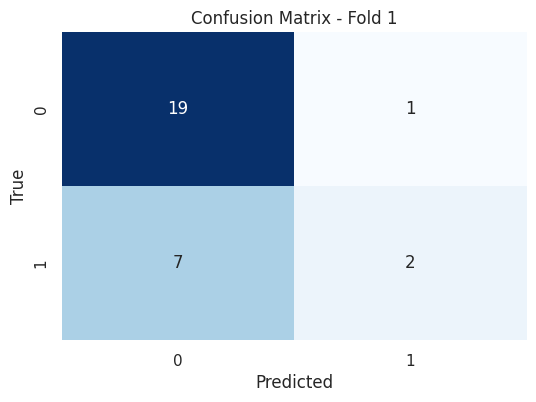

Fold 1:
Accuracy: 0.7241
Precision: 0.6667
Recall: 0.2222
F1-score: 0.3333
---


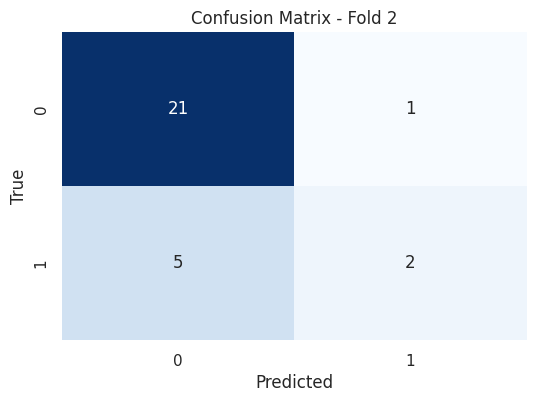

Fold 2:
Accuracy: 0.7931
Precision: 0.6667
Recall: 0.2857
F1-score: 0.4000
---


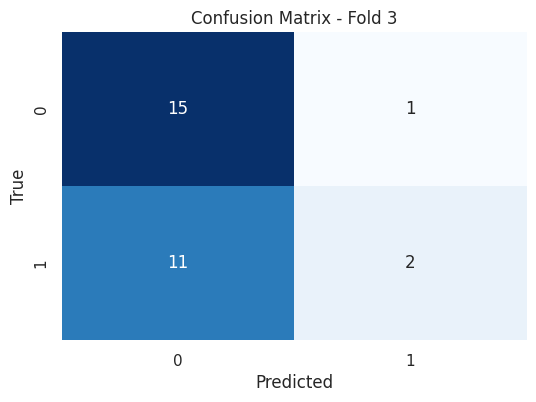

Fold 3:
Accuracy: 0.5862
Precision: 0.6667
Recall: 0.1538
F1-score: 0.2500
---


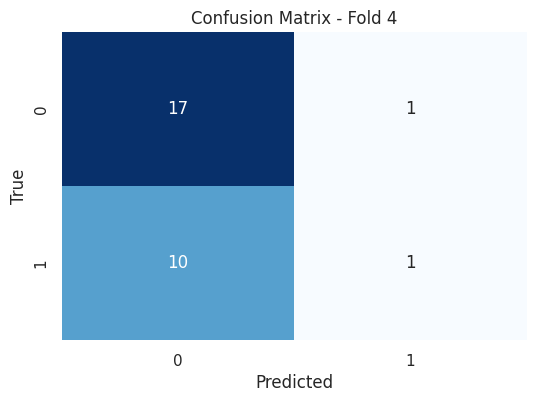

Fold 4:
Accuracy: 0.6207
Precision: 0.5000
Recall: 0.0909
F1-score: 0.1538
---


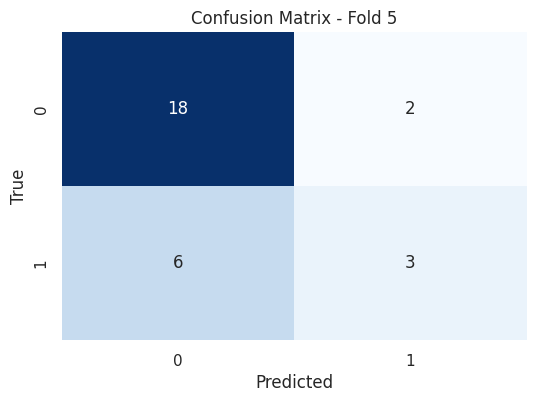

Fold 5:
Accuracy: 0.7241
Precision: 0.6000
Recall: 0.3333
F1-score: 0.4286
---

Average Metrics across all folds:
Average Accuracy: 0.6897
Average Precision: 0.6200
Average Recall: 0.2172
Average F1-score: 0.3132


In [288]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['versicolor'].astype(int)  # Ensure binary encoding (0 or 1)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Logistic Regression model
    model_versicolor = LogisticRegression()
    model_versicolor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_versicolor.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Create confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics for current fold
    print(f"Fold {fold + 1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

# Store the final average metrics in the LRversicolor variable
LRversicolor = {
    "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
    "Average Precision": sum(precision_scores) / len(precision_scores),
    "Average Recall": sum(recall_scores) / len(recall_scores),
    "Average F1-score": sum(f1_scores) / len(f1_scores)
}

# Print the stored averages
print("\nAverage Metrics across all folds:")
for metric, value in LRversicolor.items():
    print(f"{metric}: {value:.4f}")


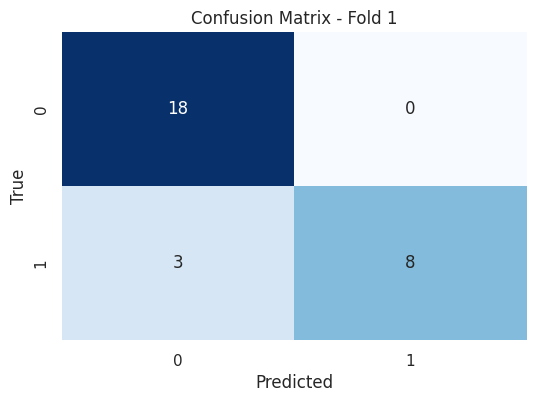

Fold 1:
Accuracy: 0.8966
Precision: 1.0000
Recall: 0.7273
F1-score: 0.8421
---


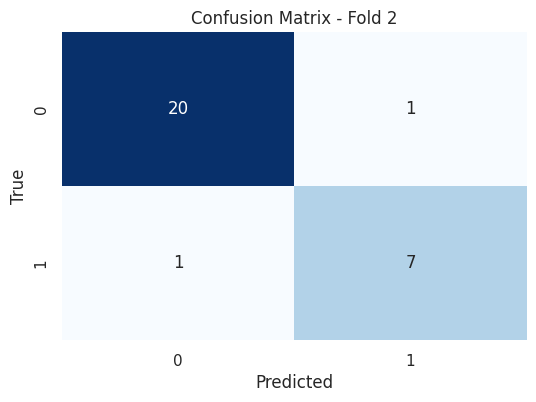

Fold 2:
Accuracy: 0.9310
Precision: 0.8750
Recall: 0.8750
F1-score: 0.8750
---


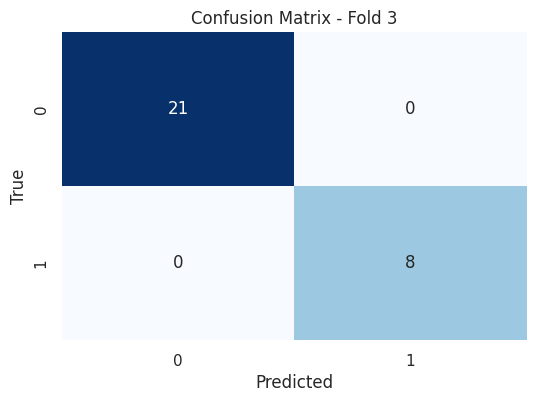

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


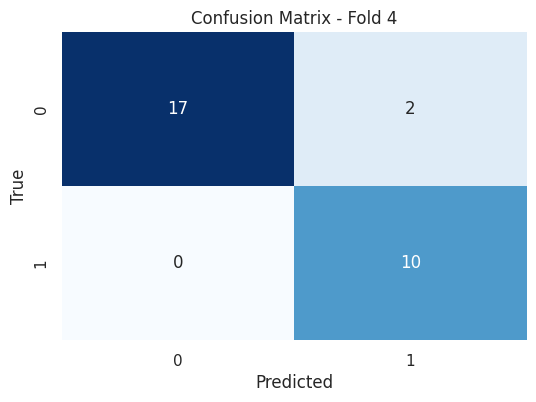

Fold 4:
Accuracy: 0.9310
Precision: 0.8333
Recall: 1.0000
F1-score: 0.9091
---


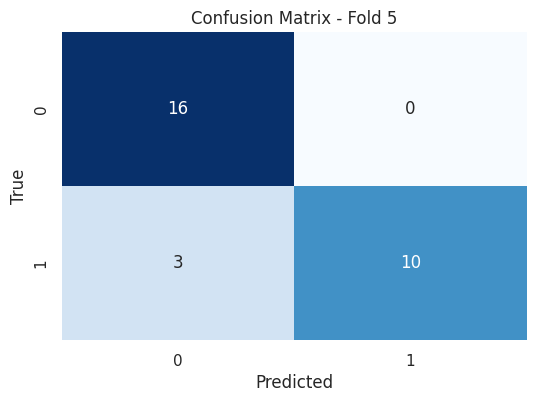

Fold 5:
Accuracy: 0.8966
Precision: 1.0000
Recall: 0.7692
F1-score: 0.8696
---

Average Metrics across all folds:
Average Accuracy: 0.9310
Average Precision: 0.9417
Average Recall: 0.8743
Average F1-score: 0.8992


In [289]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['virginica'].astype(int)  # Ensure binary encoding (0 or 1)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Logistic Regression model
    model_virginica = LogisticRegression()
    model_virginica.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_virginica.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Create confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics for current fold
    print(f"Fold {fold + 1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

# Store the final average metrics in the LRvirginica variable
LRvirginica = {
    "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
    "Average Precision": sum(precision_scores) / len(precision_scores),
    "Average Recall": sum(recall_scores) / len(recall_scores),
    "Average F1-score": sum(f1_scores) / len(f1_scores)
}

# Print the stored averages
print("\nAverage Metrics across all folds:")
for metric, value in LRvirginica.items():
    print(f"{metric}: {value:.4f}")


##KNN

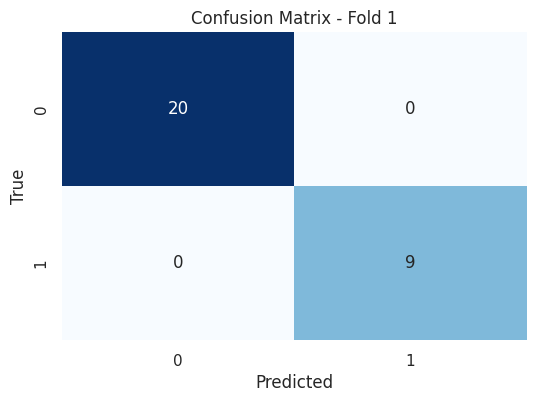

Fold 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


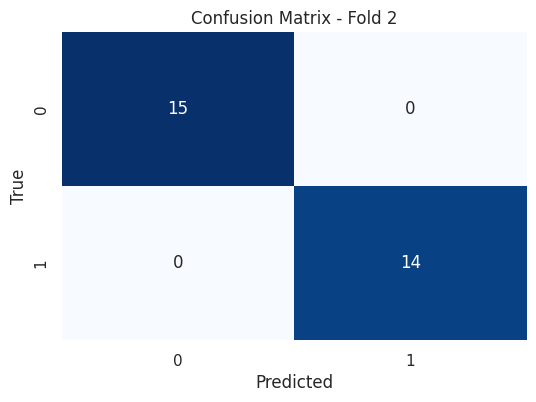

Fold 2:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


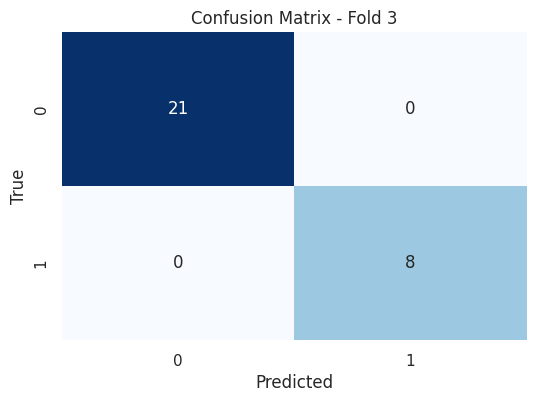

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


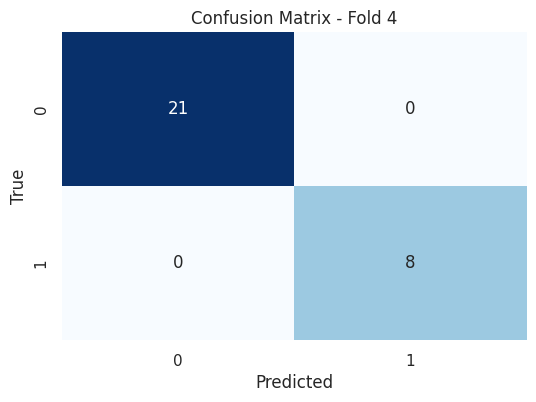

Fold 4:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


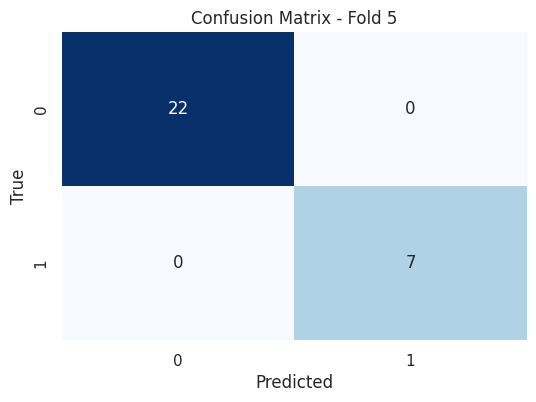

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 1.0000
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-score: 1.0000


In [290]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['setosa'].astype(int)  # Ensure binary encoding (0 or 1)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the KNN model
    knn_model_setosa = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
    knn_model_setosa.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model_setosa.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Create confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics for current fold
    print(f"Fold {fold + 1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

# Store the final average metrics in the KNNsetosa variable
KNNsetosa = {
    "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
    "Average Precision": sum(precision_scores) / len(precision_scores),
    "Average Recall": sum(recall_scores) / len(recall_scores),
    "Average F1-score": sum(f1_scores) / len(f1_scores)
}

# Print the stored averages
print("\nAverage Metrics across all folds:")
for metric, value in KNNsetosa.items():
    print(f"{metric}: {value:.4f}")


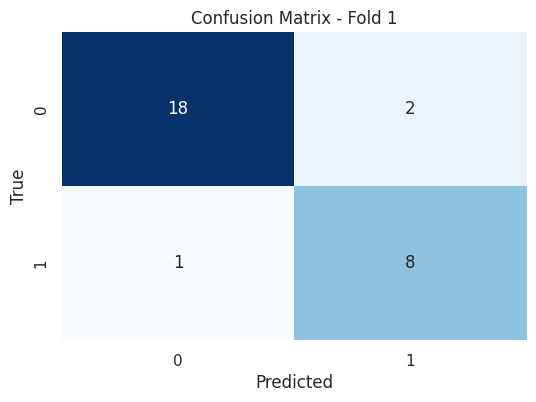

Fold 1:
Accuracy: 0.8966
Precision: 0.8000
Recall: 0.8889
F1-score: 0.8421
---


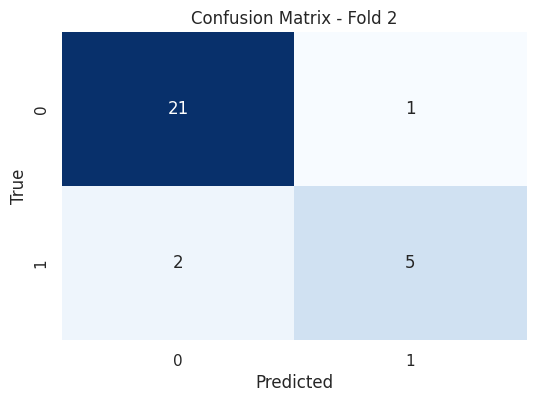

Fold 2:
Accuracy: 0.8966
Precision: 0.8333
Recall: 0.7143
F1-score: 0.7692
---


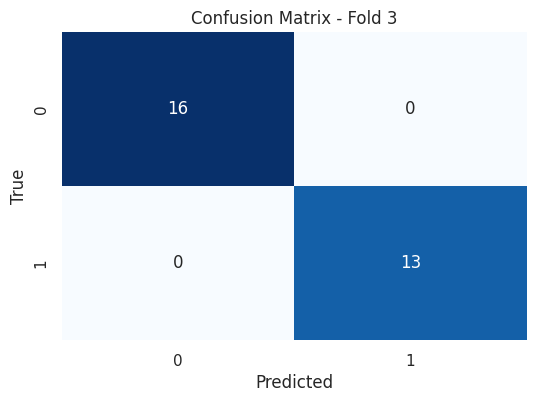

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


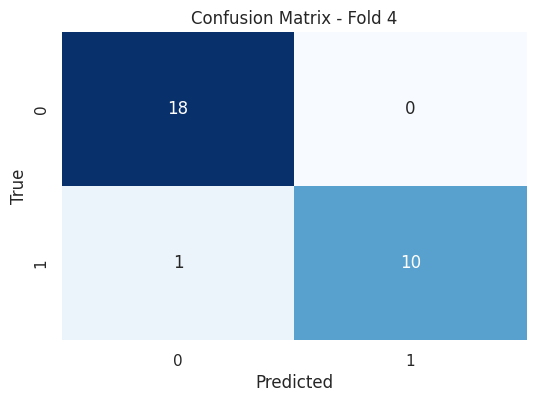

Fold 4:
Accuracy: 0.9655
Precision: 1.0000
Recall: 0.9091
F1-score: 0.9524
---


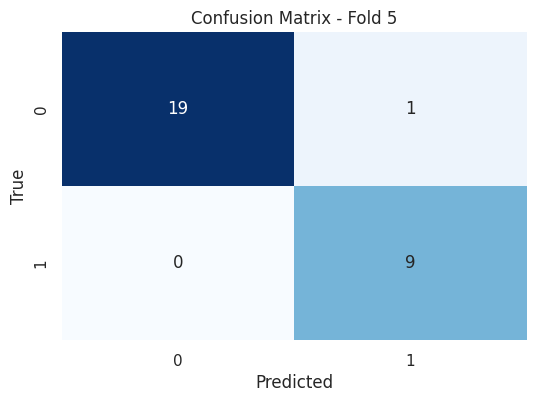

Fold 5:
Accuracy: 0.9655
Precision: 0.9000
Recall: 1.0000
F1-score: 0.9474
---

Average Metrics across all folds:
Average Accuracy: 0.9448
Average Precision: 0.9067
Average Recall: 0.9025
Average F1-score: 0.9022


In [291]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['versicolor'].astype(int)  # Ensure binary encoding (0 or 1)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the KNN model
    knn_model_versicolor = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
    knn_model_versicolor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model_versicolor.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Create confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics for current fold
    print(f"Fold {fold + 1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

# Store the final average metrics in the KNNversicolor variable
KNNversicolor = {
    "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
    "Average Precision": sum(precision_scores) / len(precision_scores),
    "Average Recall": sum(recall_scores) / len(recall_scores),
    "Average F1-score": sum(f1_scores) / len(f1_scores)
}

# Print the stored averages
print("\nAverage Metrics across all folds:")
for metric, value in KNNversicolor.items():
    print(f"{metric}: {value:.4f}")


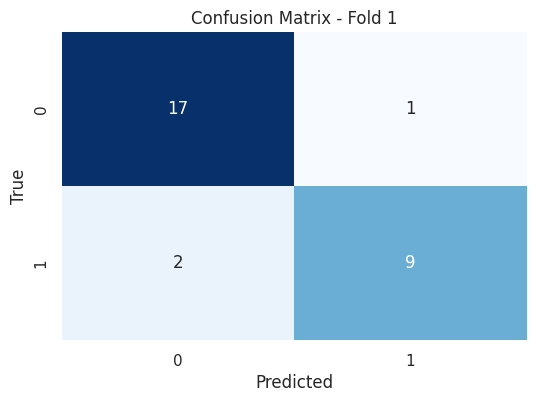

Fold 1:
Accuracy: 0.8966
Precision: 0.9000
Recall: 0.8182
F1-score: 0.8571
---


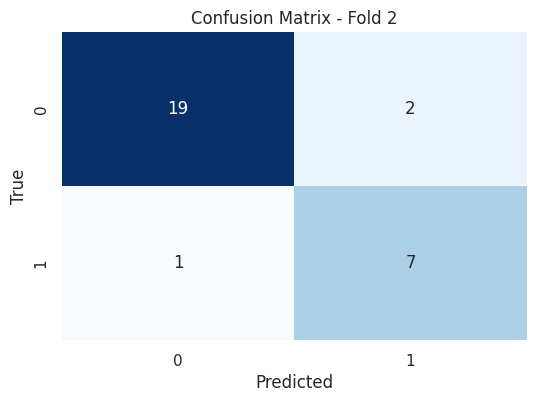

Fold 2:
Accuracy: 0.8966
Precision: 0.7778
Recall: 0.8750
F1-score: 0.8235
---


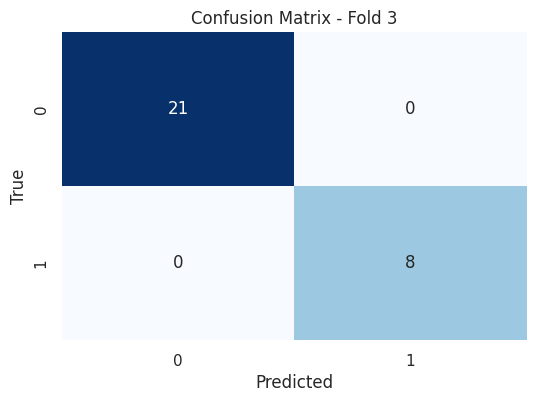

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


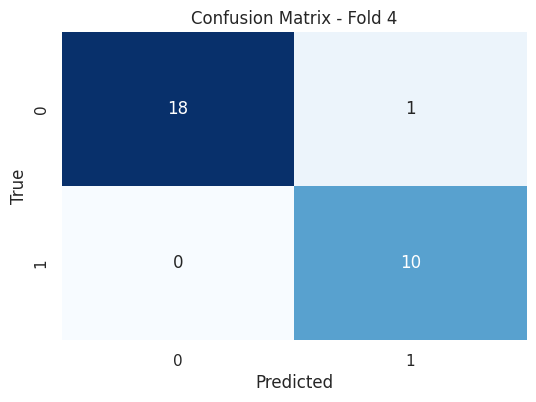

Fold 4:
Accuracy: 0.9655
Precision: 0.9091
Recall: 1.0000
F1-score: 0.9524
---


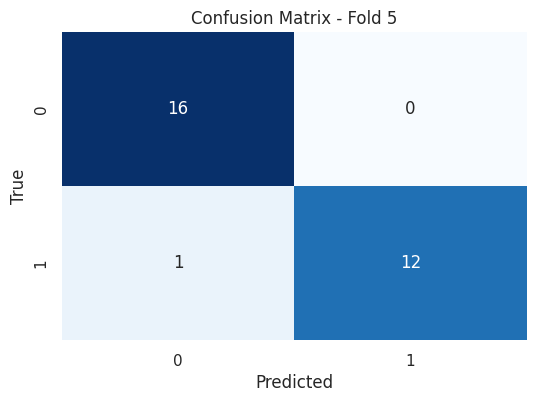

Fold 5:
Accuracy: 0.9655
Precision: 1.0000
Recall: 0.9231
F1-score: 0.9600
---

Average Metrics across all folds:
Average Accuracy: 0.9448
Average Precision: 0.9174
Average Recall: 0.9233
Average F1-score: 0.9186


In [292]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['virginica'].astype(int)  # Ensure binary encoding (0 or 1)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the KNN model
    knn_model_virginica = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
    knn_model_virginica.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model_virginica.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Create confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics for current fold
    print(f"Fold {fold + 1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

# Store the final average metrics in the KNNvirginica variable
KNNvirginica = {
    "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
    "Average Precision": sum(precision_scores) / len(precision_scores),
    "Average Recall": sum(recall_scores) / len(recall_scores),
    "Average F1-score": sum(f1_scores) / len(f1_scores)
}

# Print the stored averages
print("\nAverage Metrics across all folds:")
for metric, value in KNNvirginica.items():
    print(f"{metric}: {value:.4f}")


##SVM


--- SVM with linear kernel ---


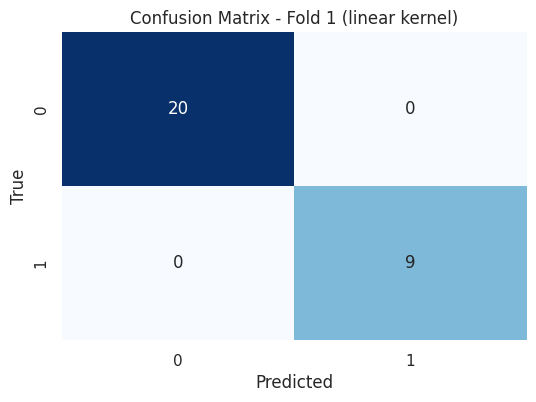

Fold 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


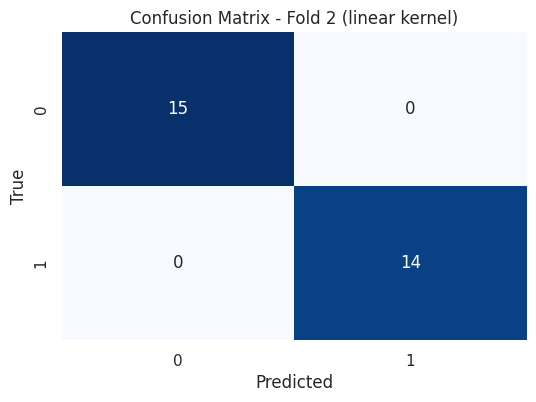

Fold 2:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


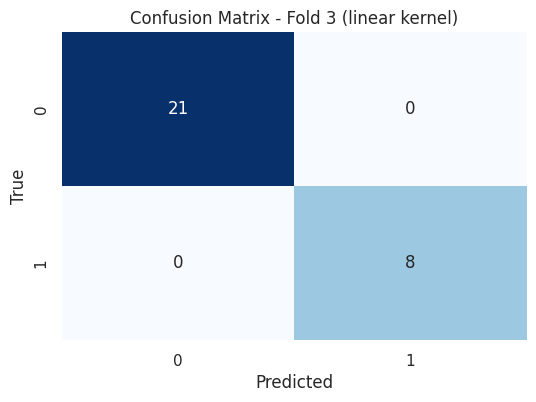

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


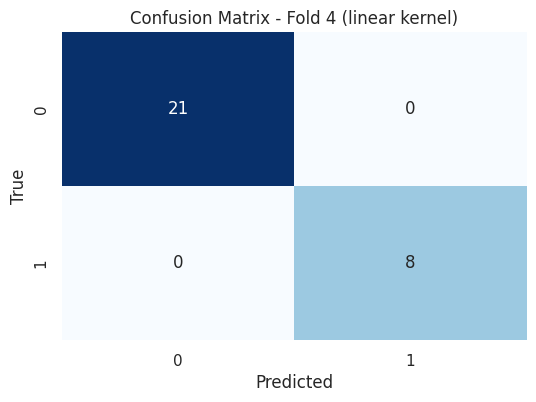

Fold 4:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


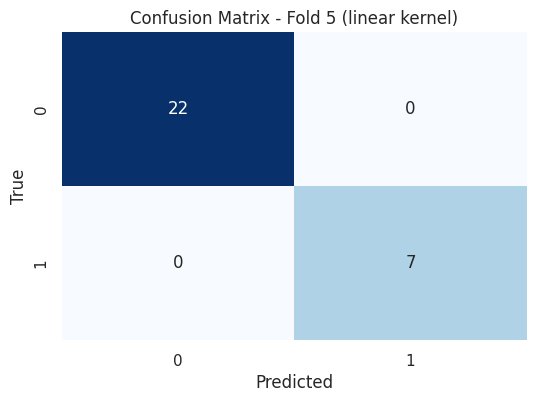

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 1.0000
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-score: 1.0000
--- SVM with rbf kernel ---


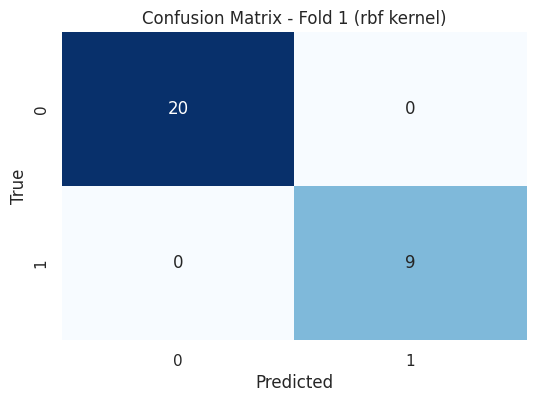

Fold 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


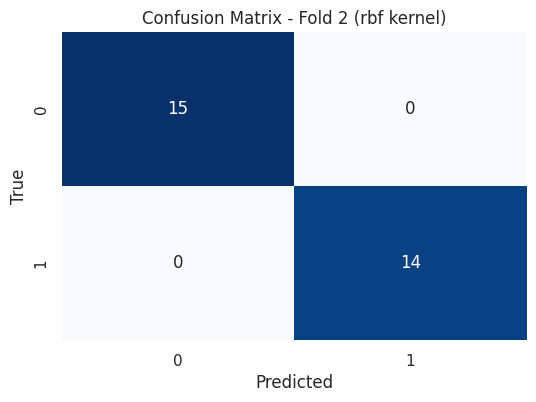

Fold 2:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


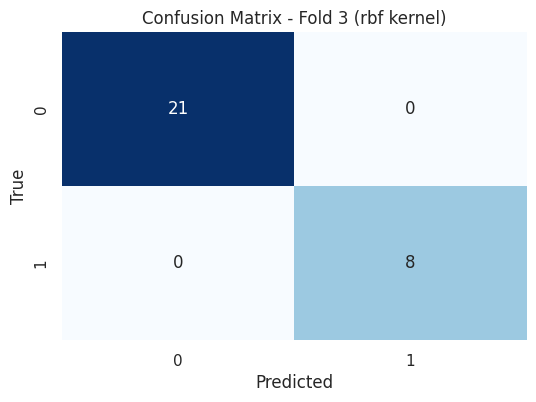

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


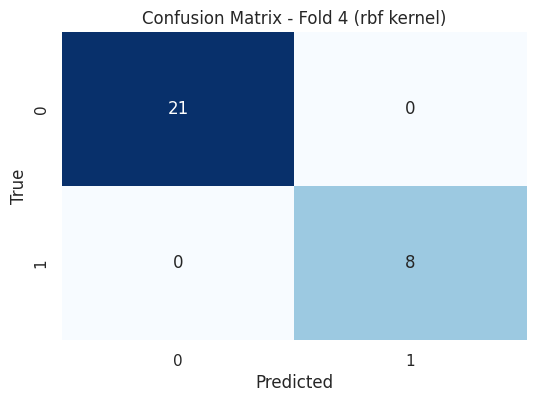

Fold 4:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


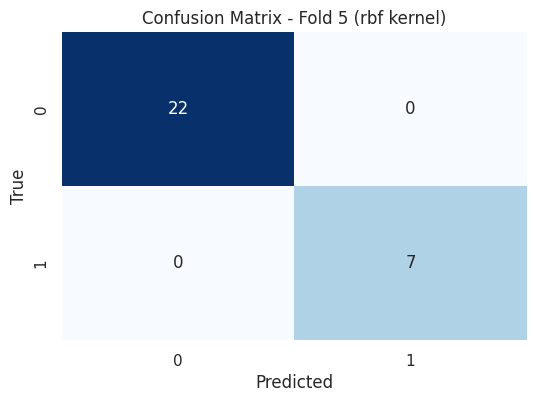

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 1.0000
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-score: 1.0000
--- SVM with poly kernel ---


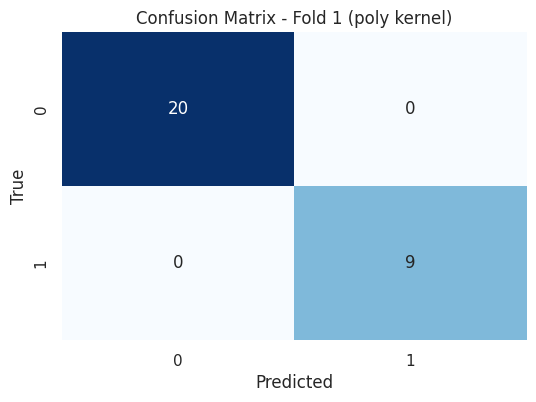

Fold 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


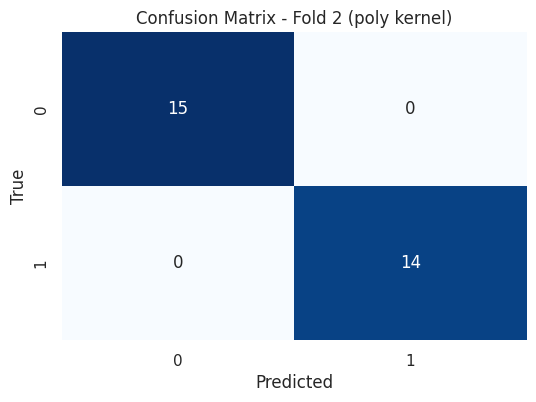

Fold 2:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


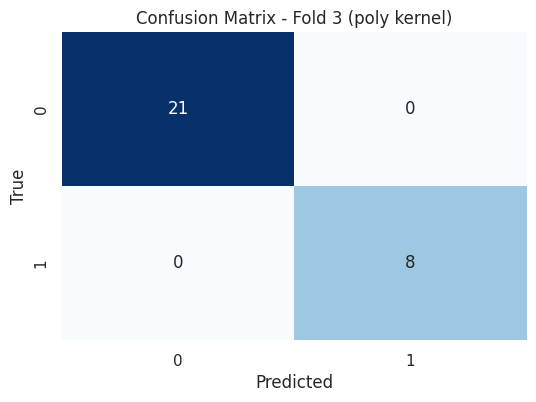

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


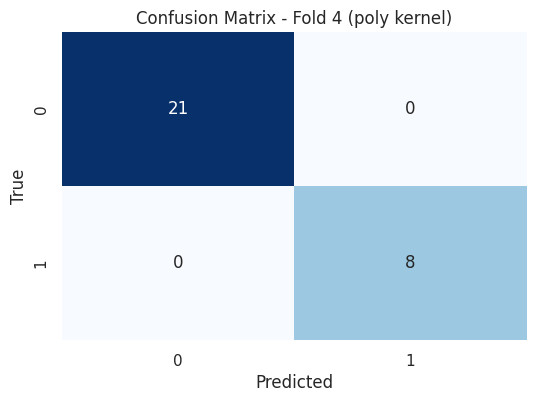

Fold 4:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


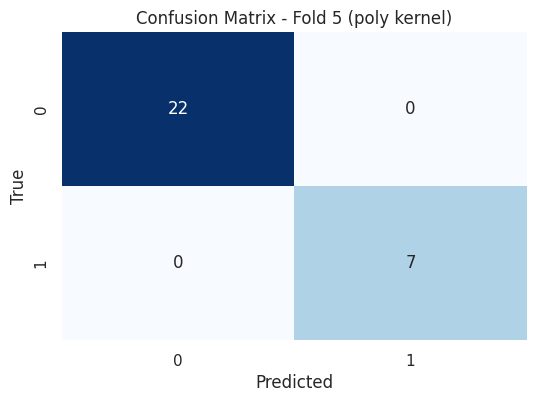

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 1.0000
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-score: 1.0000


In [293]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['setosa'].astype(int)  # Ensure binary encoding (0 or 1)

kernels = ['linear', 'rbf', 'poly']

# Dictionary to store metrics for each kernel
SVMsetosa = {}

for kernel in kernels:
    print(f"--- SVM with {kernel} kernel ---")

    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Initialize KFold cross-validator
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Iterate over each fold
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the SVM model
        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = svm_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Append metrics to lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Create confusion matrix visualization
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f'Confusion Matrix - Fold {fold + 1} ({kernel} kernel)')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print metrics for current fold
        print(f"Fold {fold + 1}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("---")

    # Store the final average metrics for this kernel in SVMsetosa
    SVMsetosa[kernel] = {
        "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
        "Average Precision": sum(precision_scores) / len(precision_scores),
        "Average Recall": sum(recall_scores) / len(recall_scores),
        "Average F1-score": sum(f1_scores) / len(f1_scores)
    }

    # Print the stored averages for this kernel
    print("\nAverage Metrics across all folds:")
    for metric, value in SVMsetosa[kernel].items():
        print(f"{metric}: {value:.4f}")
    print("===================================")

# Final dictionary SVMsetosa contains average metrics for each kernel


--- SVM with linear kernel ---


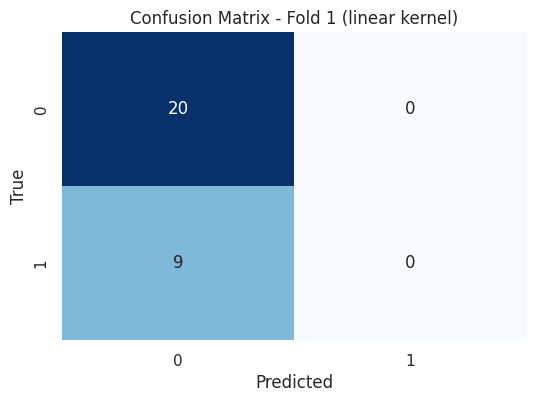

Fold 1:
Accuracy: 0.6897
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
---


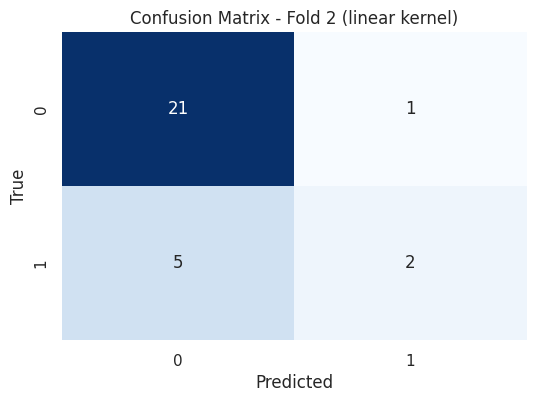

Fold 2:
Accuracy: 0.7931
Precision: 0.6667
Recall: 0.2857
F1-score: 0.4000
---


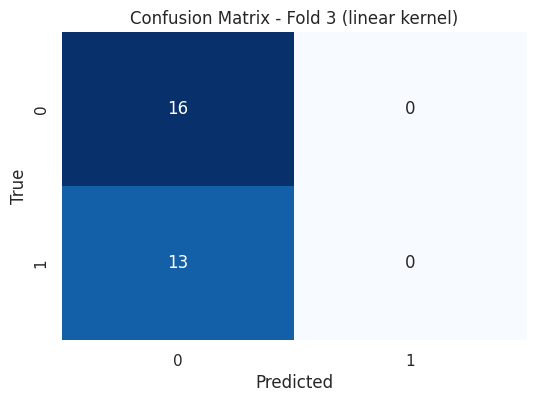

Fold 3:
Accuracy: 0.5517
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
---


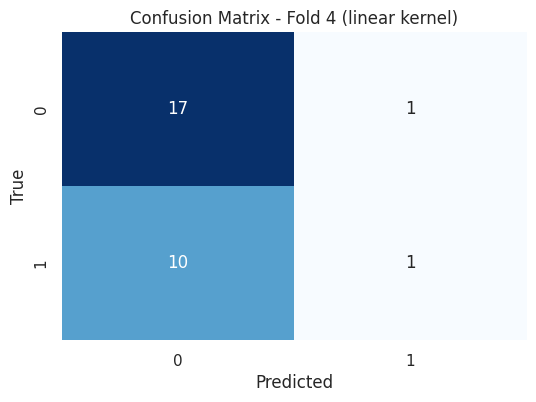

Fold 4:
Accuracy: 0.6207
Precision: 0.5000
Recall: 0.0909
F1-score: 0.1538
---


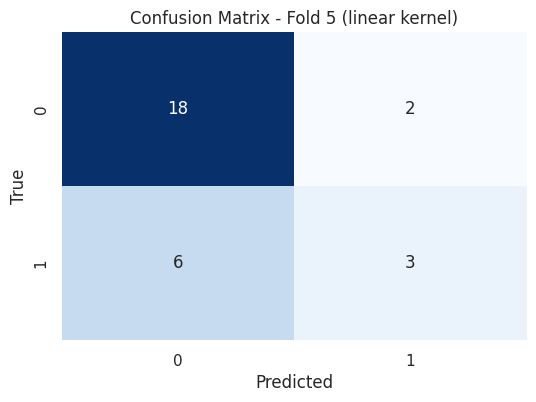

Fold 5:
Accuracy: 0.7241
Precision: 0.6000
Recall: 0.3333
F1-score: 0.4286
---

Average Metrics across all folds:
Average Accuracy: 0.6759
Average Precision: 0.3533
Average Recall: 0.1420
Average F1-score: 0.1965
--- SVM with rbf kernel ---


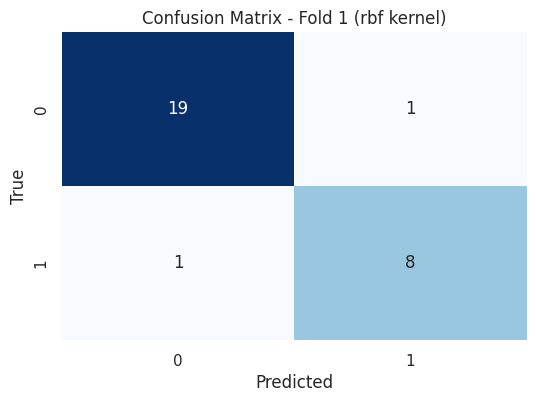

Fold 1:
Accuracy: 0.9310
Precision: 0.8889
Recall: 0.8889
F1-score: 0.8889
---


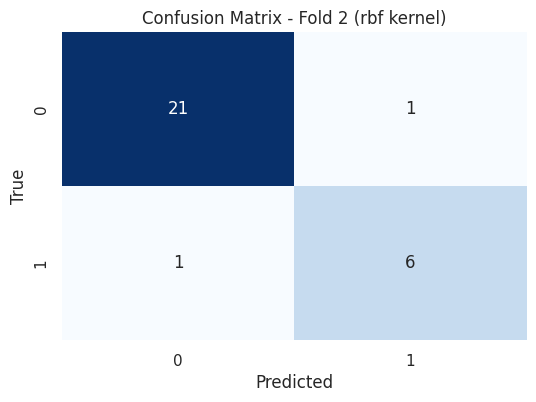

Fold 2:
Accuracy: 0.9310
Precision: 0.8571
Recall: 0.8571
F1-score: 0.8571
---


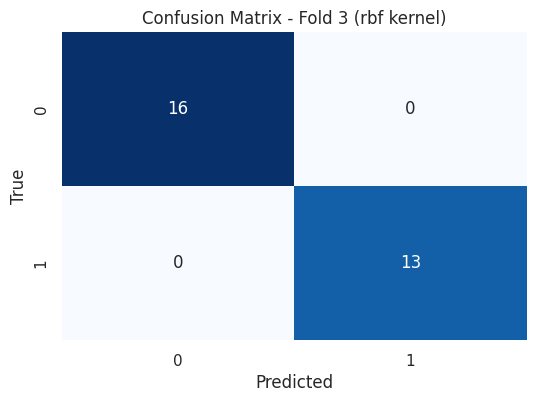

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


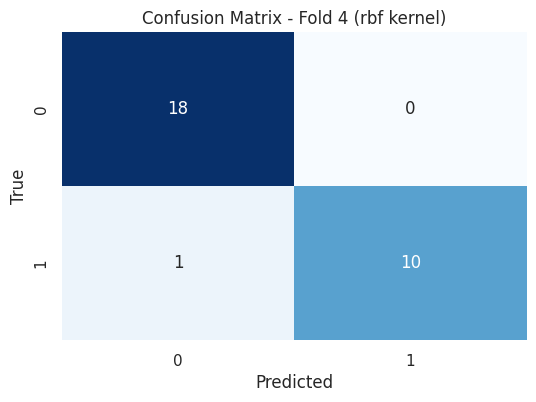

Fold 4:
Accuracy: 0.9655
Precision: 1.0000
Recall: 0.9091
F1-score: 0.9524
---


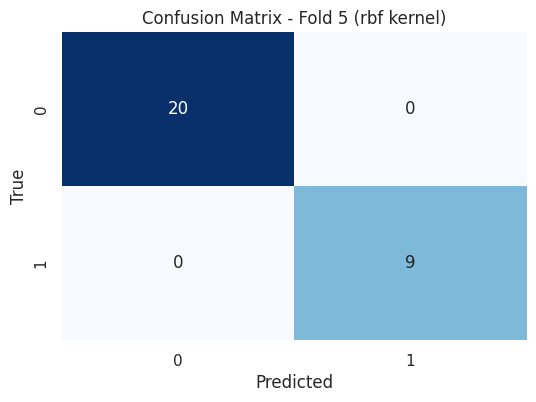

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 0.9655
Average Precision: 0.9492
Average Recall: 0.9310
Average F1-score: 0.9397
--- SVM with poly kernel ---


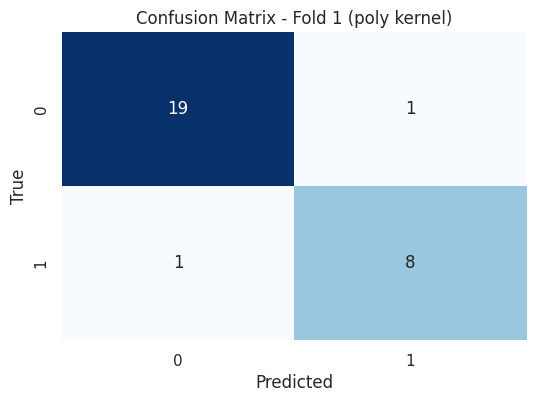

Fold 1:
Accuracy: 0.9310
Precision: 0.8889
Recall: 0.8889
F1-score: 0.8889
---


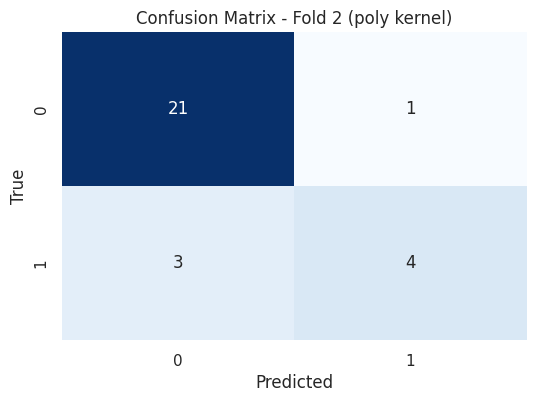

Fold 2:
Accuracy: 0.8621
Precision: 0.8000
Recall: 0.5714
F1-score: 0.6667
---


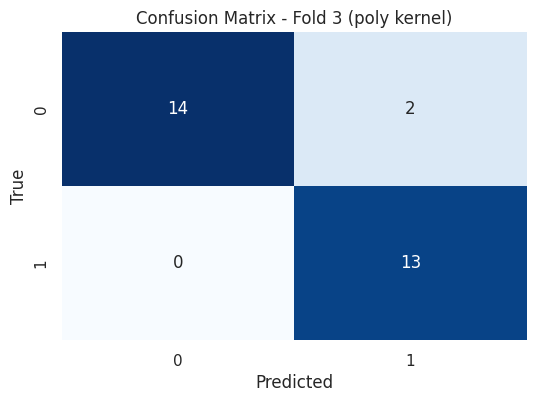

Fold 3:
Accuracy: 0.9310
Precision: 0.8667
Recall: 1.0000
F1-score: 0.9286
---


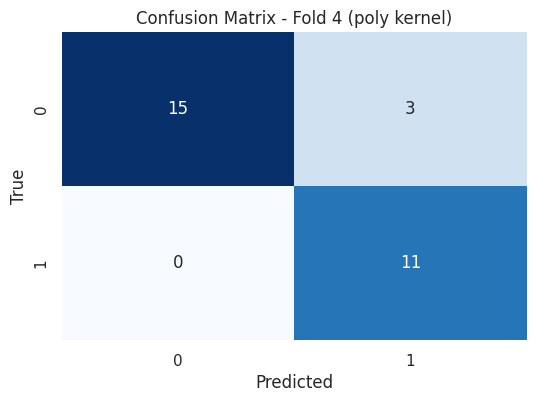

Fold 4:
Accuracy: 0.8966
Precision: 0.7857
Recall: 1.0000
F1-score: 0.8800
---


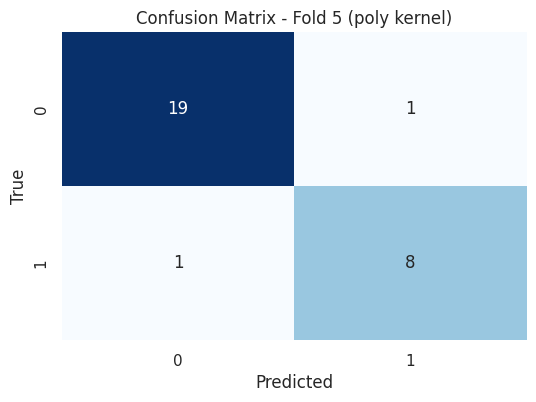

Fold 5:
Accuracy: 0.9310
Precision: 0.8889
Recall: 0.8889
F1-score: 0.8889
---

Average Metrics across all folds:
Average Accuracy: 0.9103
Average Precision: 0.8460
Average Recall: 0.8698
Average F1-score: 0.8506


In [294]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['versicolor'].astype(int)  # Ensure binary encoding (0 or 1)

kernels = ['linear', 'rbf', 'poly']

# Dictionary to store metrics for each kernel
SVMversicolor = {}

for kernel in kernels:
    print(f"--- SVM with {kernel} kernel ---")

    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Initialize KFold cross-validator
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Iterate over each fold
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the SVM model
        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = svm_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Append metrics to lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Create confusion matrix visualization
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f'Confusion Matrix - Fold {fold + 1} ({kernel} kernel)')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print metrics for current fold
        print(f"Fold {fold + 1}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("---")

    # Store the final average metrics for this kernel in SVMversicolor
    SVMversicolor[kernel] = {
        "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
        "Average Precision": sum(precision_scores) / len(precision_scores),
        "Average Recall": sum(recall_scores) / len(recall_scores),
        "Average F1-score": sum(f1_scores) / len(f1_scores)
    }

    # Print the stored averages for this kernel
    print("\nAverage Metrics across all folds:")
    for metric, value in SVMversicolor[kernel].items():
        print(f"{metric}: {value:.4f}")
    print("===================================")

# Final dictionary SVMversicolor contains average metrics for each kernel


--- SVM with linear kernel ---


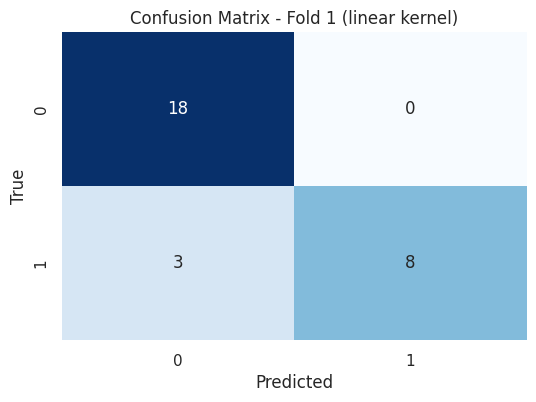

Fold 1:
Accuracy: 0.8966
Precision: 1.0000
Recall: 0.7273
F1-score: 0.8421
---


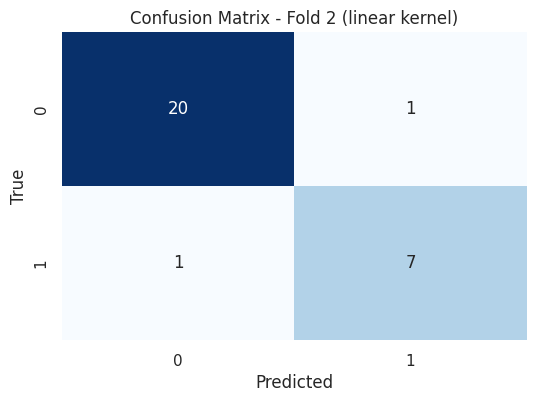

Fold 2:
Accuracy: 0.9310
Precision: 0.8750
Recall: 0.8750
F1-score: 0.8750
---


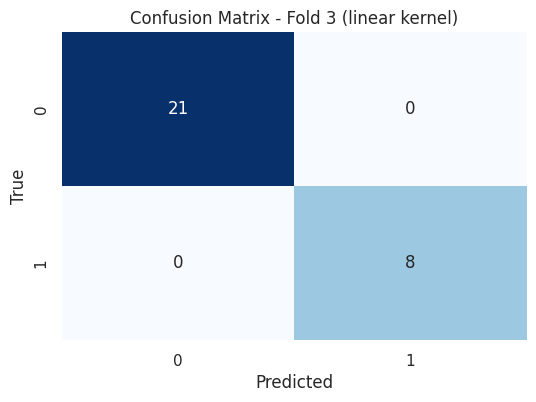

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


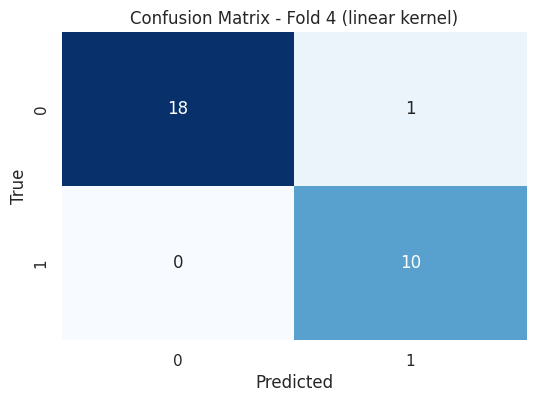

Fold 4:
Accuracy: 0.9655
Precision: 0.9091
Recall: 1.0000
F1-score: 0.9524
---


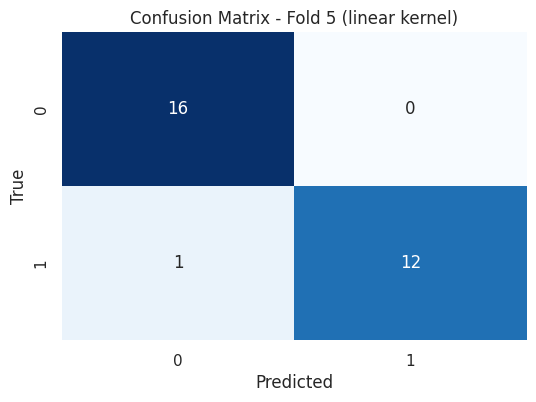

Fold 5:
Accuracy: 0.9655
Precision: 1.0000
Recall: 0.9231
F1-score: 0.9600
---

Average Metrics across all folds:
Average Accuracy: 0.9517
Average Precision: 0.9568
Average Recall: 0.9051
Average F1-score: 0.9259
--- SVM with rbf kernel ---


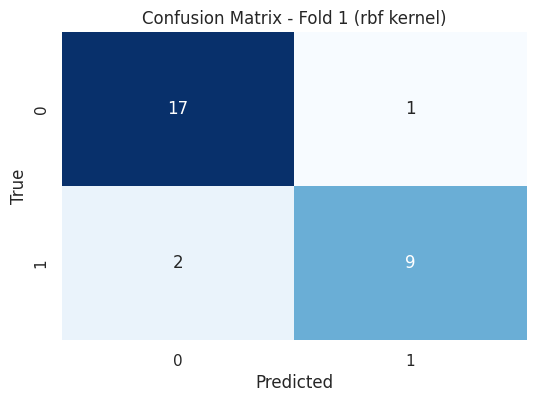

Fold 1:
Accuracy: 0.8966
Precision: 0.9000
Recall: 0.8182
F1-score: 0.8571
---


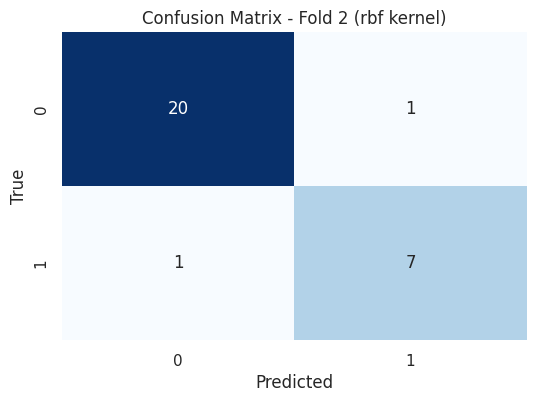

Fold 2:
Accuracy: 0.9310
Precision: 0.8750
Recall: 0.8750
F1-score: 0.8750
---


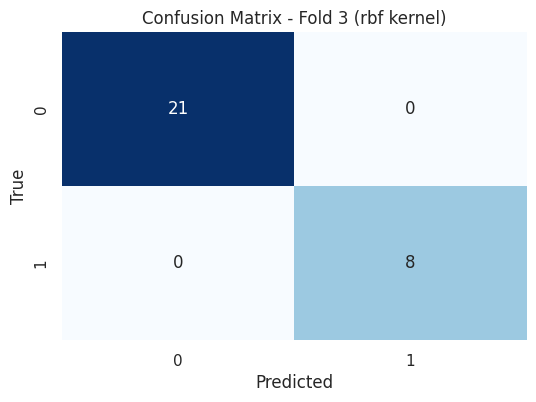

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


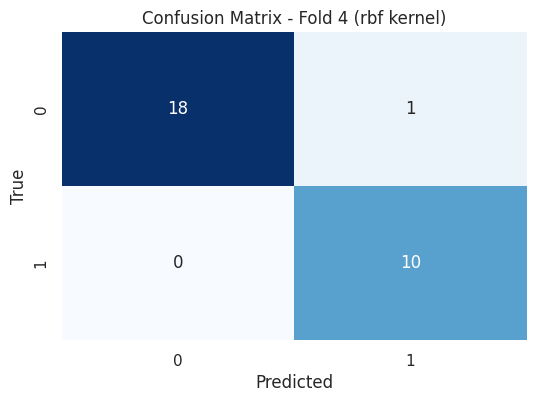

Fold 4:
Accuracy: 0.9655
Precision: 0.9091
Recall: 1.0000
F1-score: 0.9524
---


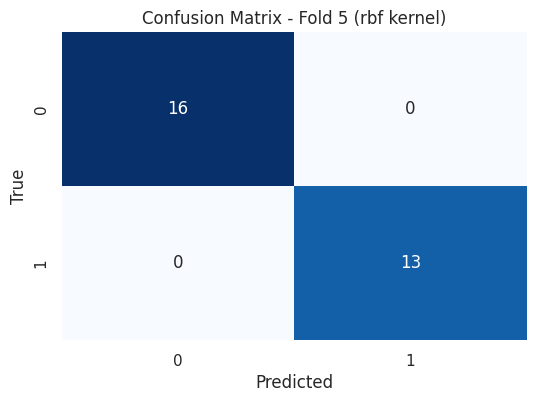

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 0.9586
Average Precision: 0.9368
Average Recall: 0.9386
Average F1-score: 0.9369
--- SVM with poly kernel ---


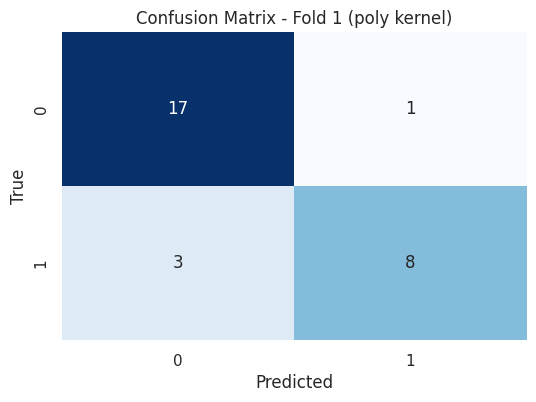

Fold 1:
Accuracy: 0.8621
Precision: 0.8889
Recall: 0.7273
F1-score: 0.8000
---


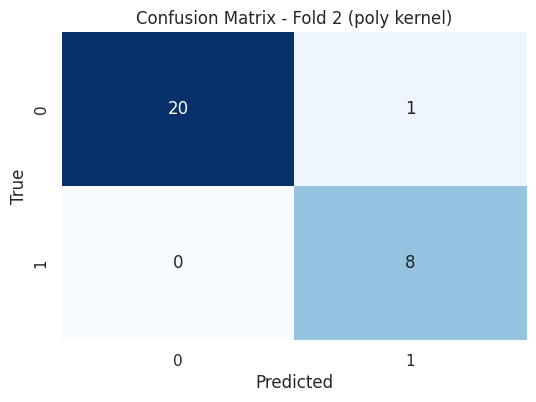

Fold 2:
Accuracy: 0.9655
Precision: 0.8889
Recall: 1.0000
F1-score: 0.9412
---


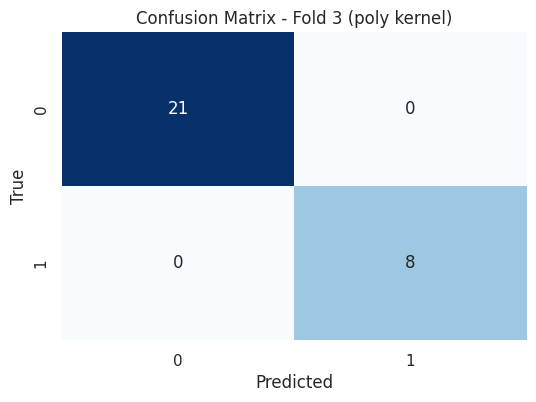

Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---


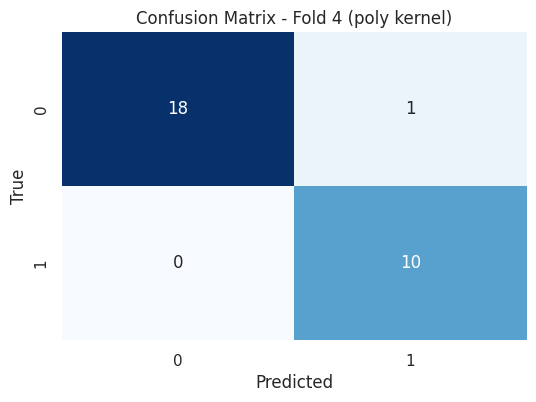

Fold 4:
Accuracy: 0.9655
Precision: 0.9091
Recall: 1.0000
F1-score: 0.9524
---


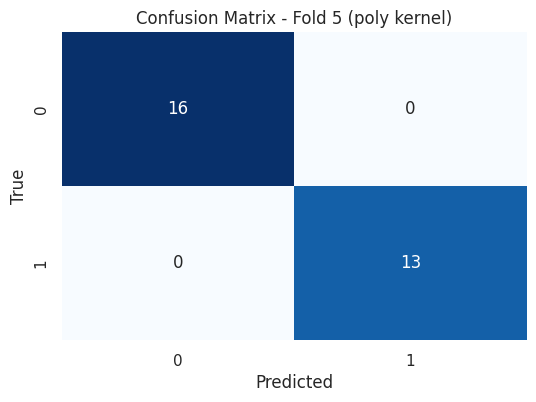

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
---

Average Metrics across all folds:
Average Accuracy: 0.9586
Average Precision: 0.9374
Average Recall: 0.9455
Average F1-score: 0.9387


In [295]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['virginica'].astype(int)  # Ensure binary encoding (0 or 1)

kernels = ['linear', 'rbf', 'poly']

# Dictionary to store metrics for each kernel
SVMvirginica = {}

for kernel in kernels:
    print(f"--- SVM with {kernel} kernel ---")

    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Initialize KFold cross-validator
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Iterate over each fold
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the SVM model
        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = svm_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Append metrics to lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Create confusion matrix visualization
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f'Confusion Matrix - Fold {fold + 1} ({kernel} kernel)')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print metrics for current fold
        print(f"Fold {fold + 1}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("---")

    # Store the final average metrics for this kernel in SVMvirginica
    SVMvirginica[kernel] = {
        "Average Accuracy": sum(accuracy_scores) / len(accuracy_scores),
        "Average Precision": sum(precision_scores) / len(precision_scores),
        "Average Recall": sum(recall_scores) / len(recall_scores),
        "Average F1-score": sum(f1_scores) / len(f1_scores)
    }

    # Print the stored averages for this kernel
    print("\nAverage Metrics across all folds:")
    for metric, value in SVMvirginica[kernel].items():
        print(f"{metric}: {value:.4f}")
    print("===================================")

# Final dictionary SVMvirginica contains average metrics for each kernel


# --- Model Comparison and Selection ---

1. Compare the performance of the different models based on their average cross-validation scores. Which model performs the best? And Why?


All models are really good at classifying Setosa species. Must have very defining features, maybe the petal width.


In [296]:
print("LR setosa:", LRSetosa)
print("KNN setosa:", KNNsetosa)
print("SVM setosa:", SVMsetosa)

# Loop through kernels and metrics
for kernel, metrics in SVMsetosa.items():
    # Access individual metrics using their respective keys
    print("######")
    print(f"SVM Average Accuracy for ({kernel}): {metrics['Average Accuracy']:.4f}")
    print("####")
    print(f"SVM Average Precision for ({kernel}): {metrics['Average Precision']:.4f}")
    print("####")
    print(f"SVM Average Recall for ({kernel}): {metrics['Average Recall']:.4f}")
    print("#####")
    print(f"SVM Average F1-score for ({kernel}): {metrics['Average F1-score']:.4f}")

LR setosa: {'Average Accuracy': 1.0, 'Average Precision': 1.0, 'Average Recall': 1.0, 'Average F1-score': 1.0}
KNN setosa: {'Average Accuracy': 1.0, 'Average Precision': 1.0, 'Average Recall': 1.0, 'Average F1-score': 1.0}
SVM setosa: {'linear': {'Average Accuracy': 1.0, 'Average Precision': 1.0, 'Average Recall': 1.0, 'Average F1-score': 1.0}, 'rbf': {'Average Accuracy': 1.0, 'Average Precision': 1.0, 'Average Recall': 1.0, 'Average F1-score': 1.0}, 'poly': {'Average Accuracy': 1.0, 'Average Precision': 1.0, 'Average Recall': 1.0, 'Average F1-score': 1.0}}
######
SVM Average Accuracy for (linear): 1.0000
####
SVM Average Precision for (linear): 1.0000
####
SVM Average Recall for (linear): 1.0000
#####
SVM Average F1-score for (linear): 1.0000
######
SVM Average Accuracy for (rbf): 1.0000
####
SVM Average Precision for (rbf): 1.0000
####
SVM Average Recall for (rbf): 1.0000
#####
SVM Average F1-score for (rbf): 1.0000
######
SVM Average Accuracy for (poly): 1.0000
####
SVM Average Prec

All models can correctly classify setosa flowers

In [297]:
print("LR versicolor:", LRversicolor)
print("KNN versicolor:", KNNversicolor)
print("SVM versicolor:", SVMversicolor)

# Loop through kernels and metrics
for kernel, metrics in SVMversicolor.items():
    # Access individual metrics using their respective keys
    print("######")
    print(f"SVM Average Accuracy for ({kernel}): {metrics['Average Accuracy']:.4f}")
    print("####")
    print(f"SVM Average Precision for ({kernel}): {metrics['Average Precision']:.4f}")
    print("####")
    print(f"SVM Average Recall for ({kernel}): {metrics['Average Recall']:.4f}")
    print("#####")
    print(f"SVM Average F1-score for ({kernel}): {metrics['Average F1-score']:.4f}")

LR versicolor: {'Average Accuracy': 0.689655172413793, 'Average Precision': 0.62, 'Average Recall': 0.2172050172050172, 'Average F1-score': 0.31315018315018317}
KNN versicolor: {'Average Accuracy': 0.9448275862068967, 'Average Precision': 0.9066666666666666, 'Average Recall': 0.9024531024531026, 'Average F1-score': 0.9022170811644497}
SVM versicolor: {'linear': {'Average Accuracy': 0.6758620689655171, 'Average Precision': 0.35333333333333333, 'Average Recall': 0.14199134199134197, 'Average F1-score': 0.1964835164835165}, 'rbf': {'Average Accuracy': 0.9655172413793103, 'Average Precision': 0.9492063492063492, 'Average Recall': 0.9310245310245311, 'Average F1-score': 0.9396825396825397}, 'poly': {'Average Accuracy': 0.9103448275862069, 'Average Precision': 0.8460317460317459, 'Average Recall': 0.86984126984127, 'Average F1-score': 0.8506031746031745}}
######
SVM Average Accuracy for (linear): 0.6759
####
SVM Average Precision for (linear): 0.3533
####
SVM Average Recall for (linear): 0.1

KNN and SVM rbf models are the only good ones for classifying versicolor based on accuracy metrics

In [298]:
print("LR virginica:", LRvirginica)
print("KNN virginica:", KNNvirginica)
print("SVM virginica:", SVMvirginica)

# Loop through kernels and metrics
for kernel, metrics in SVMvirginica.items():
    # Access individual metrics using their respective keys
    print("######")
    print(f"SVM Average Accuracy for ({kernel}): {metrics['Average Accuracy']:.4f}")
    print("####")
    print(f"SVM Average Precision for ({kernel}): {metrics['Average Precision']:.4f}")
    print("####")
    print(f"SVM Average Recall for ({kernel}): {metrics['Average Recall']:.4f}")
    print("#####")
    print(f"SVM Average F1-score for ({kernel}): {metrics['Average F1-score']:.4f}")

LR virginica: {'Average Accuracy': 0.9310344827586207, 'Average Precision': 0.9416666666666668, 'Average Recall': 0.8743006993006993, 'Average F1-score': 0.8991522779280217}
KNN virginica: {'Average Accuracy': 0.9448275862068967, 'Average Precision': 0.9173737373737374, 'Average Recall': 0.9232517482517484, 'Average F1-score': 0.918610644257703}
SVM virginica: {'linear': {'Average Accuracy': 0.9517241379310345, 'Average Precision': 0.9568181818181818, 'Average Recall': 0.9050699300699302, 'Average F1-score': 0.9258972431077694}, 'rbf': {'Average Accuracy': 0.9586206896551724, 'Average Precision': 0.9368181818181818, 'Average Recall': 0.9386363636363637, 'Average F1-score': 0.9369047619047619}, 'poly': {'Average Accuracy': 0.9586206896551724, 'Average Precision': 0.9373737373737374, 'Average Recall': 0.9454545454545455, 'Average F1-score': 0.9387114845938376}}
######
SVM Average Accuracy for (linear): 0.9517
####
SVM Average Precision for (linear): 0.9568
####
SVM Average Recall for (li

All models are good for predicting virginica flowers but SVM Poly was the best out of all of them slightly based on accuracy scores

SVM models worked really well in every case. Being able to bring analysis up into higher dimensional analysis using kernel tricks helps seperate planes of data and group species of flowers. the trick is to know which method of of SVM to use.